In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

plt.style.use("ggplot")

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

dtcol = 'pos_date'
seccol = 'security_id'
scorecol = 'd10'
start_date = '2010-07-01'
riskcol = 'clip_trisk'
retcol = 'fwdret_f1'
sectorcol = 'sector'

big_df = pd.read_csv(os.path.join(data_root, 'known_df_on_data_date.csv.gz'),
                    parse_dates=[dtcol], dtype={seccol: str},
                    usecols=[dtcol, seccol, scorecol, riskcol, retcol, sectorcol, 'in_trading_universe']).dropna(
    subset=[scorecol])

big_df.sort_values(by=[dtcol, seccol], inplace=True)

In [2]:
df = big_df.loc[big_df[dtcol] >= start_date]

In [3]:
print(df.tail())
df.groupby(dtcol).size()

        security_id      d10   pos_date  fwdret_f1 in_trading_universe  \
5687707      968101    492.0 2017-12-22   0.003124                   Y   
5687708       97801     50.0 2017-12-22   0.004930                   Y   
5687711      985601  27568.0 2017-12-22  -0.006481                   Y   
5687712     9931801    272.0 2017-12-22   0.033457                   N   
5687715      996501   1550.0 2017-12-22   0.000881                   Y   

                         sector  clip_trisk  
5687707              Financials   14.273381  
5687708              Financials   13.574392  
5687711  Consumer Discretionary   30.109790  
5687712               Materials   48.358465  
5687715             Industrials   17.555431  


pos_date
2010-07-01     980
2010-07-02     980
2010-07-08     980
2010-07-09     982
2010-07-12     982
              ... 
2017-12-18    1945
2017-12-19    1944
2017-12-20    1945
2017-12-21    1944
2017-12-22    1946
Length: 1821, dtype: int64

<AxesSubplot:xlabel='pos_date'>

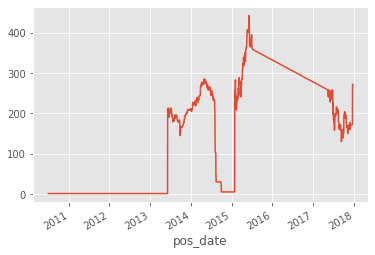

In [5]:
df.loc[df[seccol] == '9931801'].set_index(dtcol)[scorecol].plot()

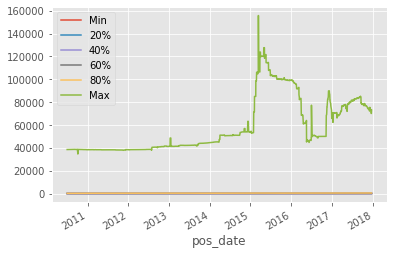

In [6]:
def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()
    
plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=True)

In [7]:
df.loc[df[scorecol].idxmin()]

security_id                       10208901
d10                                    1.0
pos_date               2010-07-01 00:00:00
fwdret_f1                        -0.001848
in_trading_universe                      Y
sector                         Industrials
clip_trisk                       36.443328
Name: 350470, dtype: object

In [8]:
df.loc[df[scorecol] < 0, scorecol] = 0

/home/jma/miniconda3/envs/python3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df[f'sqrt_{scorecol}'] = np.power(df[scorecol], 1./2.)
df[f'cubic_sqrt_{scorecol}'] = np.power(df[scorecol], 1./3.)

/home/jma/miniconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jma/miniconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df.tail()

security_id      d10   pos_date  fwdret_f1 in_trading_universe  \
5687707      968101    492.0 2017-12-22   0.003124                   Y   
5687708       97801     50.0 2017-12-22   0.004930                   Y   
5687711      985601  27568.0 2017-12-22  -0.006481                   Y   
5687712     9931801    272.0 2017-12-22   0.033457                   N   
5687715      996501   1550.0 2017-12-22   0.000881                   Y   

                         sector  clip_trisk    sqrt_d10  cubic_sqrt_d10  
5687707              Financials   14.273381   22.181073        7.894447  
5687708              Financials   13.574392    7.071068        3.684031  
5687711  Consumer Discretionary   30.109790  166.036141       30.208912  
5687712               Materials   48.358465   16.492423        6.479224  
5687715             Industrials   17.555431   39.370039       11.572945

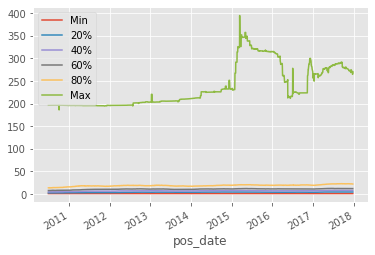

In [14]:
plot_timeseries_dist(df, f'sqrt_{scorecol}', dtcol, plot_min_max=True)

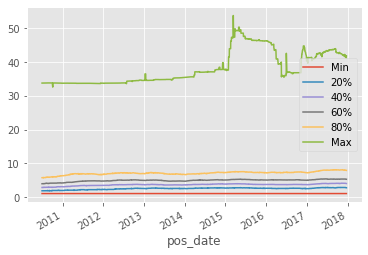

In [15]:
plot_timeseries_dist(df, f'cubic_sqrt_{scorecol}', dtcol, plot_min_max=True)

array([<AxesSubplot:xlabel='pos_date'>, <AxesSubplot:xlabel='pos_date'>],
      dtype=object)

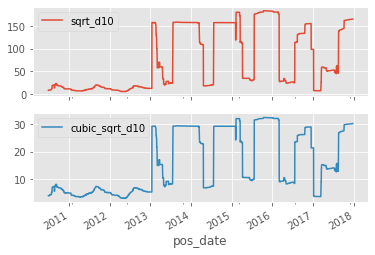

In [17]:
df.loc[df[seccol] == '985601'].set_index(dtcol)[[f'sqrt_{scorecol}', f'cubic_sqrt_{scorecol}']].plot(subplots=True)

<AxesSubplot:xlabel='pos_date'>

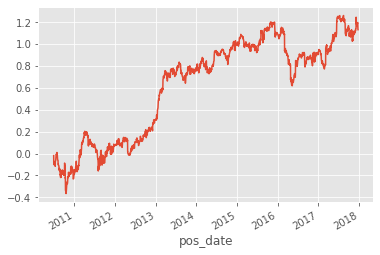

In [18]:
df.loc[df[seccol] == '985601'].set_index(dtcol)['fwdret_f1'].cumsum().plot()